In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Define Loss Function

In [33]:
def loss(x):
    val = tf.convert_to_tensor(np.array([32, 53]), dtype="float32")
    return tf.reduce_sum(tf.square(tf.subtract(x, val)))

## Create Variable

In [3]:
x = tf.Variable(tf.random.normal((2,)))

In [4]:
l = loss(x)

Tensor("Const:0", shape=(2,), dtype=float32)


In [5]:
sess = tf.InteractiveSession()

## Perform Gradient Descent

In [15]:
training_op = tf.train.AdamOptimizer(2).minimize(l, var_list=[x])
init = tf.global_variables_initializer()
X, C = [],[]
sess.run(init)
n_iter = 1000

for i in range(n_iter):
    _=sess.run(training_op)
    if i % 100 == 0:
        print("loss: "+str(sess.run(l)))
    X.append(sess.run(x))
    C.append(sess.run(l))

loss: 3632.8855
loss: 0.041633546
loss: 3.0927185e-06
loss: 1.6370905e-10
loss: 1.4551915e-11
loss: 1.4551915e-11
loss: 1.4551915e-11
loss: 1.4551915e-11
loss: 1.4551915e-11
loss: 1.4551915e-11


In [16]:
X[-1]

array([32.      , 52.999996], dtype=float32)

In [23]:
Var = np.array(X)
C = np.array(C)

## Gradient Steps

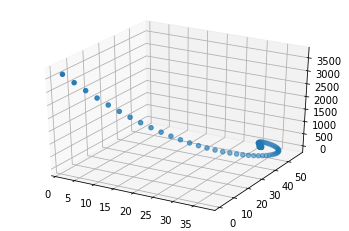

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=Var[:, 0], ys=Var[:, -1], zs=C)

## Loss Landscape

In [85]:
xline = np.linspace(0, 100, 1000)
yline = np.linspace(0, 100, 1000)
def f(x, y):
    return (x-32)**2 + (y-53)**2
X, Y = np.meshgrid(xline, yline)
zline = f(X, Y)

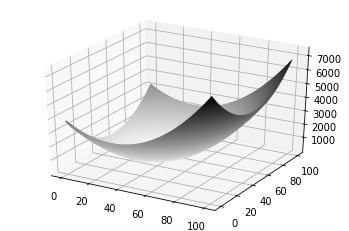

In [100]:
ax1 = plt.axes(projection='3d')
ax1.contour3D(X, Y, zline, 200, cmap='binary')